In [1]:
import pandas as pd

In [2]:
df_uk = pd.read_csv('data/uk_all_candidates.csv')
df_uk['filename'] = 'allimgs_face/' +  df_uk['candidate'] + " "+df_uk['party']
df_uk= df_uk[['filename', 'winner']]
df_uk.head()


,filename,winner
0,allimgs_face/Stephen Kinnock Labour,True
1,allimgs_face/Robin Millar Conservative,True
2,allimgs_face/Guto Bebb Conservative,True
3,allimgs_face/Kirsty Blackman Scottish National...,True
4,allimgs_face/Stephen Flynn Scottish National P...,True


In [3]:
df_germany = pd.read_csv('data/election_results_germany_2017.csv')
winners = df_germany[[df_germany.columns[4], df_germany.columns[5], df_germany.columns[7]]]
losers = df_germany[[df_germany.columns[8], df_germany.columns[9], df_germany.columns[11]]]
losers.columns = ['candidate', 'party', 'winner']
winners.columns = ['candidate', 'party', 'winner']
all_candidates = pd.concat([winners, losers])
all_candidates
all_candidates['candidate'] = all_candidates['candidate'].astype(str)
all_candidates['party'] = all_candidates['party'].astype(str)
all_candidates = all_candidates.applymap(lambda x: x.strip() if isinstance(x, str) else x)
all_candidates.drop_duplicates(inplace = True, subset = ['candidate', 'party'])
all_candidates['filename'] = all_candidates['candidate']+" "+all_candidates['party']
df_germany = all_candidates[['filename', 'winner']]
df_germany['filename'] = 'allimgs_face/' + df_germany['filename']
df_germany.head()

/Users/olafkroon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,filename,winner
0,"allimgs_face/Dr. Kaufmann, Stefan CDU",True
1,"allimgs_face/Maag, Karin CDU",True
2,"allimgs_face/Biadacz, Marc CDU",True
3,"allimgs_face/Grübel, Markus CDU",True
4,"allimgs_face/Hennrich, Michael CDU",True


In [4]:
df = pd.read_csv('data/france_2017.csv')
winner_names = []
loser_names = []
for winner_name, loser_name in zip(df[df.columns[4]].str.split(), df[df.columns[8]].str.split()):
    winner_names.append(' '.join(winner_name[1:]))
    loser_names.append(' '.join(loser_name[1:]))
    
df[df.columns[4]] = winner_names
df[df.columns[8]] = loser_names    
df.head()
winners = df[[df.columns[4], df.columns[5], df.columns[7]]]
losers = df[[df.columns[8], df.columns[9], df.columns[11]]]
losers.columns = ['candidate', 'party', 'winner']
winners.columns = ['candidate', 'party', 'winner']
all_candidates = pd.concat([winners, losers])
all_candidates
all_candidates['candidate'] = all_candidates['candidate'].astype(str)
all_candidates['party'] = all_candidates['party'].astype(str)
all_candidates = all_candidates.applymap(lambda x: x.strip() if isinstance(x, str) else x)
all_candidates.drop_duplicates(inplace = True, subset = ['candidate', 'party'])
all_candidates['filename'] = all_candidates['candidate']+' candidat'
df_france = all_candidates[['filename', 'winner']]
df_france['filename'] = 'allimgs_face/'+ df_france['filename']
df_france.head()

/Users/olafkroon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,filename,winner
0,allimgs_face/Xavier BRETON candidat,True
1,allimgs_face/Charles DE LA VERPILLIÈRE candidat,True
2,allimgs_face/Olga GIVERNET candidat,True
3,allimgs_face/Stéphane TROMPILLE candidat,True
4,allimgs_face/Damien ABAD candidat,True


In [5]:
df = pd.read_csv('data/canada_2015_2019.csv')
winners = df[[df.columns[4], df.columns[5], df.columns[7]]]
losers = df[[df.columns[8], df.columns[9], df.columns[11]]]
losers.columns = ['candidate', 'party', 'winner']
winners.columns = ['candidate', 'party', 'winner']
all_candidates = pd.concat([winners, losers])
all_candidates
all_candidates['candidate'] = all_candidates['candidate'].astype(str)
all_candidates['party'] = all_candidates['party'].astype(str)
all_candidates = all_candidates.applymap(lambda x: x.strip() if isinstance(x, str) else x)
all_candidates.drop_duplicates(inplace = True, subset = ['candidate', 'party'])
all_candidates['filename'] = all_candidates['candidate']+" "+all_candidates['party']
all_candidates['filename'] = 'allimgs_face/' + all_candidates['filename']
df_canada = all_candidates[['filename', 'winner']]
df_canada.head()

,filename,winner
0,allimgs_face/Conservative Blake Richards,True
2,allimgs_face/Conservative Damien Kurek,True
3,allimgs_face/Conservative Kevin Sorenson,True
4,allimgs_face/Conservative Martin Shields,True
6,allimgs_face/Liberal Kent Hehr,True


In [6]:
import re
df = pd.read_csv('data/usa_2018.csv')
winners = df[[df.columns[2], df.columns[3], df.columns[4]]]
losers = df[[df.columns[6], df.columns[7], df.columns[8]]]
losers.columns = ['candidate', 'party', 'winner']
winners.columns = ['candidate', 'party', 'winner']
all_candidates = pd.concat([winners, losers])
all_candidates
all_candidates['candidate'] = all_candidates['candidate'].astype(str)
all_candidates['party'] = all_candidates['party'].astype(str)
all_candidates = all_candidates.applymap(lambda x: x.strip() if isinstance(x, str) else x)
all_candidates.drop_duplicates(inplace = True, subset = ['candidate', 'party'])
p = re.compile(r'[^\w\s]+')
all_candidates['candidate'] = [p.sub('', x) for x in all_candidates['candidate'].tolist()]
all_candidates['filename'] = all_candidates['candidate']+" "+all_candidates['party']


all_candidates['filename']  = "allimgs_face/"+ all_candidates['filename'] 
df_usa = all_candidates[['filename', 'winner']]
df_usa.head()

,filename,winner
0,allimgs_face/Bradley Byrne GOP,True
2,allimgs_face/Martha Roby GOP,True
4,allimgs_face/Mike Rogers GOP,True
6,allimgs_face/Robert Aderholt GOP,True
8,allimgs_face/Mo Brooks GOP,True


In [7]:
all_results = pd.concat([df_usa, df_canada, df_france, df_uk, df_germany])
all_results.reset_index(inplace = True, drop = True)
# all_results.to_csv('data/all_results.csv')

import unidecode
def decode(x):
    return unidecode.unidecode(x)
all_results[all_results.columns[0]] = all_results[all_results.columns[0]].apply(decode)
all_results

winners = all_results.loc[all_results['winner'] == False]
len(all_results)

6515

In [8]:
leftovers = []
all_img_data = []
import os
import glob
for folder, winner in zip(all_results['filename'], all_results['winner']):
    if folder not in ['allimgs_face/Candidate Votes', 'allimgs_face/. MARIE SARA candidat']:
        if os.path.isdir(folder):
            files = [f for f in glob.glob(folder + "**/*", recursive=True)]
            for file in files:
                all_img_data.append([file,winner])
        else:
            print(folder)
            leftovers.append(folder)

allimgs_face/John Garamendi Dem
allimgs_face/Gary Swing GP
allimgs_face/Anthony Mills -
allimgs_face/Christine Russell GOP
allimgs_face/Ronald Kabat -
allimgs_face/Bryan Witt Dem
allimgs_face/Sean Flynn GOP
allimgs_face/Christian Valiente GOP
allimgs_face/Russell Lambert GOP
allimgs_face/Jennifer Nye GOP
allimgs_face/Herman West GOP
allimgs_face/Jimmy Lee Tillman GOP
allimgs_face/George McDermott GOP
allimgs_face/John Hugo GOP
allimgs_face/Sam Johnson nan
allimgs_face/Marc Herschfus GOP
allimgs_face/Greg Ryan GOP
allimgs_face/Robert Vroman GOP
allimgs_face/Eric Fisher GOP
allimgs_face/Agha Khan GOP
allimgs_face/Ernest Johnson nan
allimgs_face/Renee Zeno GOP
allimgs_face/Jim Burgess GOP
allimgs_face/Dan David GOP
allimgs_face/Patrick Donovan GOP
allimgs_face/Tim Bjorkman Dem
allimgs_face/Jody Ball GOP
allimgs_face/Justin Kanew Dem
allimgs_face/Other nan
allimgs_face/Jeffrey Blunt Libt
allimgs_face/Eric Holguin Dem
allimgs_face/Shawn Jones Libt
allimgs_face/Douglas Dightman GOP
allimgs_f

allimgs_face/Ian Cuthbert Conservative
allimgs_face/Virginia Morris Conservative
allimgs_face/Gareth McKeever Conservative
allimgs_face/Jeff Clarke Conservative
allimgs_face/Margaret Phelps Liberal Democrat
allimgs_face/Ken Wood Conservative
allimgs_face/Richard Burt Liberal Democrat
allimgs_face/Paschke, Markus Alfred Josef SPD
allimgs_face/Limbacher, Esra-Leon Ruben SPD
allimgs_face/Lupart, Ulrich Willi AfD
allimgs_face/Gunther, Carsten AfD
allimgs_face/Ludwig, Torsten AfD


In [12]:
# remove webp
all_img_dat_no_webp = []
for element in all_img_data:
    if '.webp' in element[0] or element[0].endswith('.txt'):
        None
    else:
        all_img_dat_no_webp.append(element)

In [13]:
# Remove small images
from PIL import Image
import collections
import matplotlib.pyplot as plt
all_img_df = pd.DataFrame(all_img_dat_no_webp)
all_imgs_large = []
removed = 0
for file_name, winner in zip(all_img_df[all_img_df.columns[0]].values, all_img_df[all_img_df.columns[1]].values):
    file_name = file_name.split('/')
    file_name = 'allimgs_face'+'/'+file_name[1]+'/'+file_name[2]
    img = Image.open(file_name)
    width, height = img.size
    if width < 100 or height < 100:
        removed +=1
    else:
        all_imgs_large.append([file_name, winner])
        
all_img_df = pd.DataFrame(all_imgs_large)
winners = all_img_df.loc[all_img_df[all_img_df.columns[1]] == True]
winners.drop_duplicates(inplace = True)
losers = all_img_df.loc[all_img_df[all_img_df.columns[1]] == False]
print('removed imgs: ', removed)
print('total',len(losers)+ len(winners))
print("loser", len(losers))
print('winner', len(winners))
print('loser_percentage', (len(losers) / (len(losers) +len(winners))))

removed imgs:  982
total 10766
loser 5284
winner 5482
loser_percentage 0.4908043841723946


/Users/olafkroon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


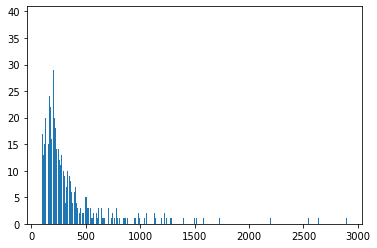

In [14]:
# Show distribution of sizes
loser_sizes = {}
files_not_found = []
for file_name in losers[losers.columns[0]].values:
    file_name = file_name.split('/')
    file_name = 'allimgs_face'+'/'+file_name[1]+'/'+file_name[2]
    img = Image.open(file_name)
    width, height = img.size
    if width in loser_sizes:
        loser_sizes[width] = loser_sizes[width] +1

    else:
        loser_sizes[width] = 1
        

loser_sizes = collections.OrderedDict(sorted(loser_sizes.items()))
plt.bar(loser_sizes.keys(), loser_sizes.values())
plt.show()

2375


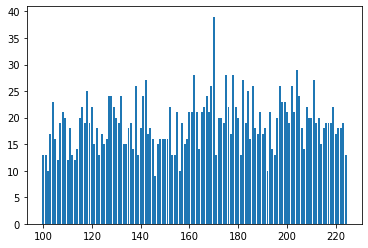

In [15]:
# print(loser_sizes)
new_ls = loser_sizes.copy()
for key in new_ls.keys():
    if key > 224:
        del loser_sizes[key]
plt.bar(loser_sizes.keys(), loser_sizes.values())
total_imgs = 0
for  value in loser_sizes.values():
    total_imgs +=  value
print(total_imgs)
plt.show()
# print(loser_sizes)

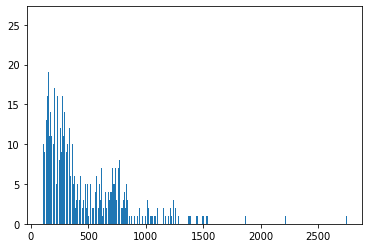

In [16]:
winner_sizes = {}
files_not_found = []
for file_name in winners[winners.columns[0]].values:
    file_name = file_name.split('/')
    file_name = 'allimgs_face'+'/'+file_name[1]+'/'+file_name[2]
    img = Image.open(file_name)
    width, height = img.size
    if width in winner_sizes:
        winner_sizes[width] = winner_sizes[width] +1

    else:
        winner_sizes[width] = 1
winner_sizes = collections.OrderedDict(sorted(winner_sizes.items()))
plt.bar(winner_sizes.keys(), winner_sizes.values())
plt.show()



1601


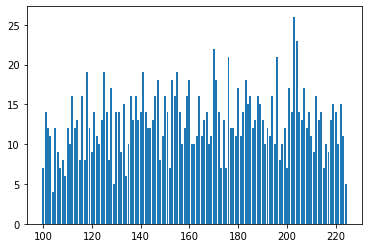

In [17]:
new_ws = winner_sizes.copy()
for key in new_ws.keys():
    if key > 224:
        del winner_sizes[key]
plt.bar(winner_sizes.keys(), winner_sizes.values())
total_imgs_w = 0
for  value in winner_sizes.values():
    total_imgs_w +=  value
print(total_imgs_w)
plt.show()

In [18]:
# all_img_df.drop_duplicates(inplace = True)
# all_img_df
# all_img_df.to_csv('data/all_imgs_clean_nosmall.csv')

In [19]:
# Split data on individual politicians
def get_name(row):
    return row.split('/')[1]

all_img_df['name'] = all_img_df[all_img_df.columns[0]].apply(get_name)
names = all_img_df[['name']]
names.drop_duplicates(inplace = True)
print("ALL UNIQUE CANDIDATES", len(names))

# Split train, validation, andtest data
test_set_len = int(len(names) * 0.1)
train_len = int(len(names) - test_set_len )
names = names.sample(frac=1).reset_index(drop=True)
names
test_names = names[-test_set_len:]
train_names = names[:train_len]
train_names
val_len = int(len(train_names) * 0.05)
train_len = int(len(train_names) - val_len )
val_names = train_names[-val_len:]
train_names = train_names[:train_len]
test_names


train_df = pd.merge(train_names, all_img_df, on='name')
test_df = pd.merge(test_names, all_img_df, on = 'name')
val_df = pd.merge(val_names, all_img_df, on = 'name')
val_df

# ALL TO CSV WHEN READY!

ALL UNIQUE CANDIDATES 6082


/Users/olafkroon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,name,0,1
0,New Democratic Wayne Stetski,allimgs_face/New Democratic Wayne Stetski/Wayn...,True
1,Conservative Larry Miller,allimgs_face/Conservative Larry Miller/5da2b87...,True
2,Bloc Quebecois Louis Plamondon,allimgs_face/Bloc Quebecois Louis Plamondon/Ph...,True
3,Bloc Quebecois Louis Plamondon,allimgs_face/Bloc Quebecois Louis Plamondon/lo...,True
4,Christine CLOAREC candidat,allimgs_face/Christine CLOAREC candidat/google...,True
5,Christine CLOAREC candidat,allimgs_face/Christine CLOAREC candidat/google...,True
6,Christine CLOAREC candidat,allimgs_face/Christine CLOAREC candidat/google...,True
7,Christine CLOAREC candidat,allimgs_face/Christine CLOAREC candidat/google...,True
8,Christine CLOAREC candidat,allimgs_face/Christine CLOAREC candidat/google...,True
9,James Dawson Labour,allimgs_face/James Dawson Labour/google_James ...,False


In [20]:
train_df.to_csv('train_on_cand.csv')
test_df.to_csv('test_on_cand.csv')
val_df.to_csv('val_on_cand.csv')

In [30]:
winners = val_df.loc[val_df[val_df.columns[2]] == True]
losers = val_df.loc[val_df[val_df.columns[2]] == False]
winners
# val_df
print(len(winners) / (len(losers)+ len(winners)))

0.48523206751054854
